In [30]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.request import URLError

In [7]:
try : 
    html = urlopen('https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx')
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')

In [8]:
soup


<!DOCTYPE html>

<html lang="ko">
<head><title>
	기록실 | 기록 | KBO
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="text/javascript" http-equiv="Content-Script-Type"/><meta content="text/css" http-equiv="Content-Style-Type"/><meta content="IE=edge, Chrome" http-equiv="X-UA-Compatible"/><meta content="KBO" name="title"/><meta content="스포츠투아이" name="author"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" name="keywords"/><meta content="width=1200" name="viewport"/><meta content="website" property="og:type"/><meta content="KBO 홈페이지" property="og:title"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" property="og:description"/><meta content="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/open_graph_kbo.png" property="og:image"/><meta content="//www.koreabaseball.com/" property="og:url"/>
<link href="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/fa

In [9]:
# first p tag
soup.p

<p>(사)한국야구위원회</p>

In [10]:
# first a tag
soup.a

<a href="/Member/Login.aspx">로그인</a>

In [14]:
table = soup.find('table', {'class' : 'tData01 tt'})
table

<table cellpadding="0" cellspacing="0" class="tData01 tt" summary="선수 기본기록으로 경기,타석,타수,득점,안타,2루타, 3루타 등을 표시합니다">
<colgroup>
<col width="50"/>
<col width="80"/>
<col width="50"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="60"/>
<col width="60"/>
</colgroup>
<thead>
<tr>
<th>순위</th>
<th>선수명</th>
<th>팀명</th>
<th><a href="javascript:sort('HRA_RT');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타율">AVG</a></th>
<th><a href="javascript:sort('GAME_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="경기">G</a></th>
<th><a href="javascript:sort('PA_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타석">PA</a></th>
<th><a href="javascript:sort('AB_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타수">AB</a></th>
<th><a href="javascript:sort('RUN_CN');" onmouseenter="tooltip(t

In [42]:
# 선수명, AVG, H, HR, RBI --> list

baseball = []

for tr in table.find_all('tr') :
    #print(tr)
    tds = tr.find_all('td')
    for td in tds :
        if td.find('a') :
            #print(td.find('a').text)
            baseball.append([td.find('a').text, tds[3].text, tds[8].text, tds[11].text, tds[13].text])

baseball

[['최형우', '0.354', '185', '28', '115'],
 ['손아섭', '0.352', '190', '11', '85'],
 ['로하스', '0.349', '192', '47', '135'],
 ['박민우', '0.345', '161', '8', '63'],
 ['페르난데스', '0.340', '199', '21', '105'],
 ['이정후', '0.333', '181', '15', '101'],
 ['허경민', '0.332', '145', '7', '58'],
 ['김현수', '0.331', '181', '22', '119'],
 ['강백호', '0.330', '165', '23', '89'],
 ['양의지', '0.328', '151', '33', '124'],
 ['나성범', '0.324', '170', '34', '112'],
 ['황재균', '0.312', '169', '21', '97'],
 ['김동엽', '0.312', '129', '20', '74'],
 ['오재일', '0.312', '147', '16', '89'],
 ['구자욱', '0.307', '137', '15', '78'],
 ['최주환', '0.306', '156', '16', '88'],
 ['터커', '0.306', '166', '32', '113'],
 ['박석민', '0.306', '109', '14', '63'],
 ['이명기', '0.306', '146', '2', '45'],
 ['김하성', '0.306', '163', '30', '109'],
 ['김상수', '0.304', '123', '5', '47'],
 ['박건우', '0.304', '148', '14', '70'],
 ['오지환', '0.300', '158', '10', '71'],
 ['정수빈', '0.298', '146', '5', '59'],
 ['조용호', '0.296', '121', '0', '32'],
 ['정훈', '0.295', '121', '11', '58'],
 ['채은성', 

In [60]:
# csv 파일 저장

with open('baseball.csv', 'w', encoding='utf-8') as file :
    for base in baseball :
        file.write('{},{},{},{},{}\n'.format(base[0],base[1],base[2],base[3],base[4]))
print('file-save')

file-save


In [2]:
import numpy as np
import pandas as pd

baseball_data = pd.read_csv('./baseball.csv', header=None)
print(type(baseball_data))
baseball_data.head()

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5
0,NaN,name,AVG,H,HR,RBI
1,0.0,최형우,0.354,185,28,115
2,1.0,손아섭,0.35200000000000004,190,11,85
3,2.0,로하스,0.349,192,47,135
4,3.0,박민우,0.345,161,8,63


In [76]:
baseball_data.rename(columns = {0 : 'name', 1 : 'AVG', 2 : 'H', 3 : 'HR', 4 : 'RBI'}, inplace = True)
baseball_data.head()

,name,AVG,H,HR,RBI
0,최형우,0.354,185,28,115
1,손아섭,0.352,190,11,85
2,로하스,0.349,192,47,135
3,박민우,0.345,161,8,63
4,페르난데스,0.340,199,21,105


In [77]:
# DataFrame csv저장

baseball_data.to_csv('baseball.csv', mode='w', encoding='utf-8')

In [13]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

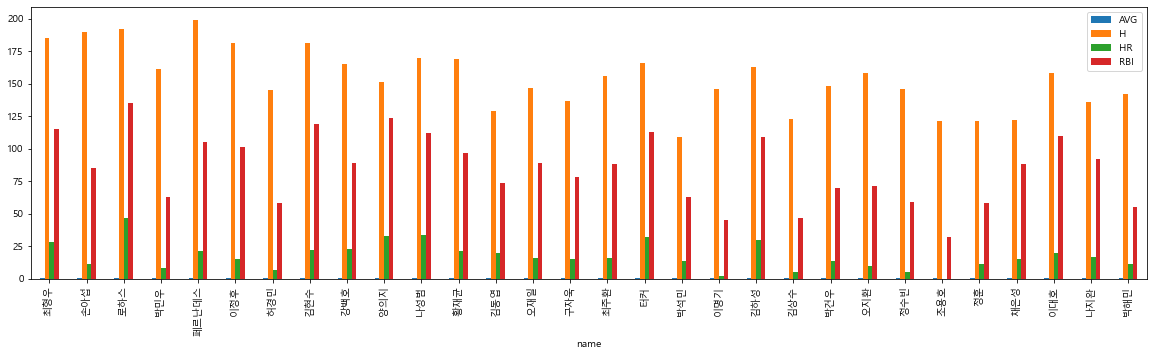

<function matplotlib.pyplot.close(fig=None)>

In [94]:
# 시각화
fig = plt.figure()

baseball_data.plot.bar(x='name', figsize=(20,5))

plt.show()
plt.close

In [69]:
# DB 생성

import pymongo as mongo
conn = mongo.MongoClient()

baseballDB = conn.baseballDB
baseballDB

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'baseballDB')

In [70]:
# collection 생성

baseballCollection = baseballDB['baseball']
baseballCollection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'baseballDB'), 'baseball')

In [71]:
# insert

baseball_info_list = []

for obj in baseball :
    baseball_info_list.append({
        'name' : obj[0],
        'AVG' : obj[1],
        'H' : obj[2],
        'HR' : obj[3],
        'RBI' : obj[4],
    })
    
baseball_info_list

[{'name': '최형우', 'AVG': '0.354', 'H': '185', 'HR': '28', 'RBI': '115'},
 {'name': '손아섭', 'AVG': '0.352', 'H': '190', 'HR': '11', 'RBI': '85'},
 {'name': '로하스', 'AVG': '0.349', 'H': '192', 'HR': '47', 'RBI': '135'},
 {'name': '박민우', 'AVG': '0.345', 'H': '161', 'HR': '8', 'RBI': '63'},
 {'name': '페르난데스', 'AVG': '0.340', 'H': '199', 'HR': '21', 'RBI': '105'},
 {'name': '이정후', 'AVG': '0.333', 'H': '181', 'HR': '15', 'RBI': '101'},
 {'name': '허경민', 'AVG': '0.332', 'H': '145', 'HR': '7', 'RBI': '58'},
 {'name': '김현수', 'AVG': '0.331', 'H': '181', 'HR': '22', 'RBI': '119'},
 {'name': '강백호', 'AVG': '0.330', 'H': '165', 'HR': '23', 'RBI': '89'},
 {'name': '양의지', 'AVG': '0.328', 'H': '151', 'HR': '33', 'RBI': '124'},
 {'name': '나성범', 'AVG': '0.324', 'H': '170', 'HR': '34', 'RBI': '112'},
 {'name': '황재균', 'AVG': '0.312', 'H': '169', 'HR': '21', 'RBI': '97'},
 {'name': '김동엽', 'AVG': '0.312', 'H': '129', 'HR': '20', 'RBI': '74'},
 {'name': '오재일', 'AVG': '0.312', 'H': '147', 'HR': '16', 'RBI': '89'},

In [72]:
baseballCollection.insert_many(baseball_info_list)

In [73]:
baseballCollection.find_one()

{'_id': ObjectId('60482de248f6c2d278caf71a'),
 'name': '최형우',
 'AVG': '0.354',
 'H': '185',
 'HR': '28',
 'RBI': '115'}

### Image scraping 

In [4]:
from urllib.parse import quote_plus
import urllib.request

In [109]:
baseUrl = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
searchKeyword = input('검색어 입력 : ')
maxCnt = int(input('갯수 : '))

url = baseUrl + quote_plus(searchKeyword)

try : 
    html = urlopen(url)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')

soup

검색어 입력 : 비숑
갯수 : 10


<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="비숑 : 네이버 이미지검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'비숑'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'비숑'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>비숑 : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210304.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic

In [107]:
img = soup.find_all('img', {'class' : 'bg_laoding'})
img

[]

### 영화 평점순위

In [31]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210309'

try : 
    html = urlopen(url)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')

soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20210309" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [119]:
# movie name : text, string, get_text

soup.find_all('div', 'tit5')[0].a.text

'원더'

In [121]:
# 평점 가져오기

soup.find_all('td', 'point')[0].string

'9.51'

In [123]:
len(soup.find_all('td','point'))

50

In [33]:
# 영화명, 평점을 담는 리스트 생성

movie_list = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, 50)]
point_list = [soup.find_all('td', 'point')[n].string for n in range(0, 50)]

In [34]:
print(movie_list)
print(point_list)

['원더', '극장판 바이올렛 에버가든', '동주', '서유기 2 - 선리기연', '부활: 그 증거', '소울', '엽기적인 그녀', '나, 다니엘 블레이크', '극장판 귀멸의 칼날: 무한열차편', '똥파리', '서유기 - 월광보합', '해피 투게더', '라야와 마지막 드래곤', '러브레터', '싸이코', '타오르는 여인의 초상', '더 헌트', '남매의 여름밤', '러브 액츄얼리', '중경삼림', '나는 내일, 어제의 너와 만난다', '람보-특별판', '달라스 바이어스 클럽', '너의 이름은.', '화양연화', '더 포스트', '찬실이는 복도 많지', '당신, 거기 있어줄래요', '캐롤', '분노', '세자매', '그녀', '아비정전', '원챈스', '제로 다크 서티', '비포 미드나잇', '클로저', '하나와 앨리스', '해리 포터와 불의 잔', '무드 인디고', '일대종사', '날씨의 아이', '미나리', '별을 쫓는 아이', '철벽선생', '퍼펙트 케어', '톰과 제리', '미션 파서블', '은혼', '더블패티']
['9.51', '9.50', '9.37', '9.36', '9.34', '9.31', '9.29', '9.28', '9.27', '9.22', '9.21', '9.20', '9.17', '9.12', '9.10', '9.06', '8.97', '8.95', '8.93', '8.92', '8.91', '8.88', '8.79', '8.79', '8.79', '8.76', '8.74', '8.71', '8.60', '8.55', '8.54', '8.53', '8.48', '8.32', '8.21', '8.19', '8.18', '8.11', '8.03', '8.02', '8.00', '7.95', '7.92', '7.92', '7.77', '7.67', '7.66', '7.62', '7.20', '7.14']


In [35]:
# 날짜 생성 : 오늘을 기준으로 50일 --> pd.date_range()
# 날짜, 영화명, 평점 DF 생성

date_list = pd.date_range('20210310', periods=50)
movieDF = pd.DataFrame({'날짜' : date_list,
                       '영화명' : movie_list,
                       '평점' : point_list})
movieDF.head()

,날짜,영화명,평점
0,2021-03-10,원더,9.51
1,2021-03-11,극장판 바이올렛 에버가든,9.50
2,2021-03-12,동주,9.37
3,2021-03-13,서유기 2 - 선리기연,9.36
4,2021-03-14,부활: 그 증거,9.34


In [36]:
movieDF['평점'] = movieDF['평점'].astype(float)
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      50 non-null     datetime64[ns]
 1   영화명     50 non-null     object        
 2   평점      50 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.3+ KB


In [47]:
movieDF.sort_values(by='평점', ascending=False, inplace=True)
movieDF.head()

,날짜,영화명,평점
0,2021-03-10,원더,9.51
1,2021-03-11,극장판 바이올렛 에버가든,9.50
2,2021-03-12,동주,9.37
3,2021-03-13,서유기 2 - 선리기연,9.36
4,2021-03-14,부활: 그 증거,9.34


In [148]:
# DB생성
conn = mongo.MongoClient()

movieDB = conn.movieDB
movieDB

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'movieDB')

In [149]:
# collection 생성

movieCollection = movieDB['movie_rank']
movieCollection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'movieDB'), 'movie_rank')

In [51]:
# insert

movie_rank_list = []

for obj in movieDF :
    movie_rank_list.append({
        'date' : movieDF['날짜'],
        'name' : movieDF['영화명'],
        'point' : movieDF['평점']
    })
    
movie_rank_list

[{'date': 0    2021-03-10
  1    2021-03-11
  2    2021-03-12
  3    2021-03-13
  4    2021-03-14
  5    2021-03-15
  6    2021-03-16
  7    2021-03-17
  8    2021-03-18
  9    2021-03-19
  10   2021-03-20
  11   2021-03-21
  12   2021-03-22
  13   2021-03-23
  14   2021-03-24
  15   2021-03-25
  16   2021-03-26
  17   2021-03-27
  18   2021-03-28
  19   2021-03-29
  20   2021-03-30
  21   2021-03-31
  22   2021-04-01
  23   2021-04-02
  24   2021-04-03
  25   2021-04-04
  26   2021-04-05
  27   2021-04-06
  28   2021-04-07
  29   2021-04-08
  30   2021-04-09
  31   2021-04-10
  32   2021-04-11
  33   2021-04-12
  34   2021-04-13
  35   2021-04-14
  36   2021-04-15
  37   2021-04-16
  38   2021-04-17
  39   2021-04-18
  40   2021-04-19
  41   2021-04-20
  42   2021-04-21
  43   2021-04-22
  44   2021-04-23
  45   2021-04-24
  46   2021-04-25
  47   2021-04-26
  48   2021-04-27
  49   2021-04-28
  Name: 날짜, dtype: datetime64[ns],
  'name': 0                    원더
  1         극장판 바이올렛 에버

### wordcloud

In [152]:
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'

try : 
    html = urlopen(url)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser', from_encoding='utf-8')

soup


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///title/tt4154756?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Avengers: Infinity War (2018) - Avengers: Infinity War (2018) - User Reviews - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitl

In [153]:
# 별점, 리뷰제목, 작성자 닉네임, 작성날짜, 리뷰내용

In [155]:
soup.find_all('div', 'imdb-user-review')

[<div class="lister-item mode-detail imdb-user-review collapsable" data-review-id="rw6506593" data-vote-url="/title/tt4154756/review/rw6506593/vote/interesting">
 <div class="review-container">
 <div class="lister-item-content">
 <a class="title" href="/review/rw6506593/"> A film that pulled off the impossible.
 </a> <div class="display-name-date">
 <span class="display-name-link"><a href="/user/ur89226807/">cartermain</a></span><span class="review-date">20 January 2021</span>
 </div>
 <div class="content">
 <div class="text show-more__control">Avengers: Infinity War is a film that should be utter crap. A franchise stretching almost twenty films is unheard of. And making a great and satisfying climax to that franchise is nearly impossible. Considering how many characters Marvel had to juggle together with this movie, there was almost no way this movie wouldn't suck.<br/><br/>But it didn't. Marvel pulled it off. All of the characters were balanced seemingly effortlessly. The action was 

### 자연어 처리
- JDK 설치 및 JAVA_HOME
- conda install konlpy
- 꼬꼬마 : http://kkma.snu.ac.kr/documents/index.jsp?doc=postag

##### (cmd)
- python
- import nltk
- nltk.download (stopwords , punkt) 

##### (andconda prompt)
- conda install -c conda-forge jpype1
- 버전이 안맞을 때 : https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
- conda install -c conda-forge wordcloud
- conda install -c confa-forge gensim

In [8]:
from konlpy.tag import Kkma
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import pandas as pd
from PIL import Image

In [4]:
kkoma = Kkma()

In [5]:
kkoma.nouns('설치하는데 시간이 너무 오래 걸렸다.')

['설치', '시간']

In [6]:
kkoma.sentences('설치하는데 시간이 너무 오래 걸렸다.')

['설치하는데 시간이 너무 오래 걸렸다.']

In [7]:
kkoma.pos('설치하는데 시간이 너무 오래 걸렸다.')

[('설치', 'NNG'),
 ('하', 'XSV'),
 ('는데', 'ECD'),
 ('시간', 'NNG'),
 ('이', 'JKS'),
 ('너무', 'MAG'),
 ('오래', 'MAG'),
 ('걸리', 'VV'),
 ('었', 'EPT'),
 ('다', 'EFN'),
 ('.', 'SF')]

In [11]:
text = open('../data/07. alice.txt').read()
text

'癤풮roject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what i

In [16]:
maskimg = np.array(Image.open('../data/07. alice_mask.png'))
maskimg

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

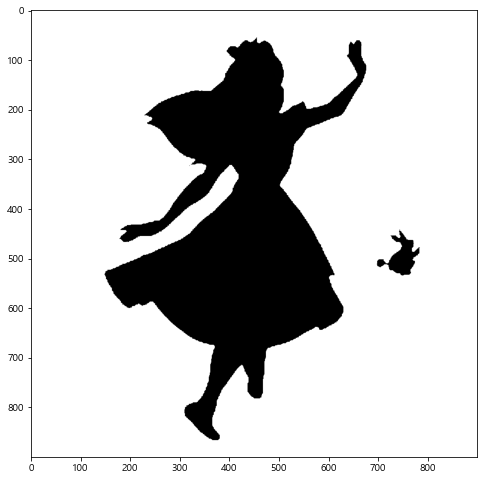

In [17]:
plt.figure(figsize=(8,9))
plt.imshow(maskimg, cmap=plt.cm.gray)
plt.show()

In [26]:
sw = set(STOPWORDS)
sw.add('sad')

wc = WordCloud(mask=maskimg, max_words=2000, background_color='white')

In [27]:
wc = wc.generate(text)

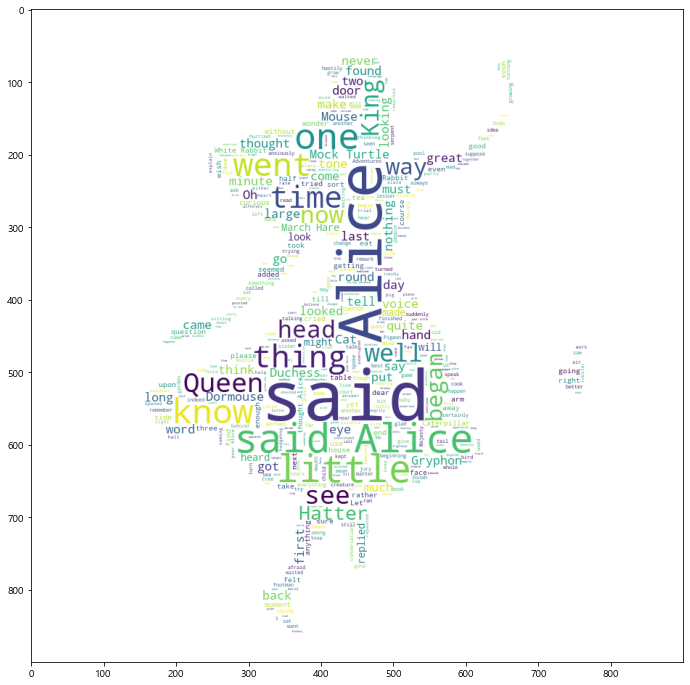

In [28]:
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.show()
plt.close()